In [1]:
from kurtogram import fast_kurtogram
import numpy as np
from crawlab_toolbox import plotting

from freq_tools import generateFFT
from scipy import signal

from matplotlib import pyplot as plt


In [2]:
data = np.genfromtxt('aoyu_example_data.txt',skip_header=23,delimiter='\n')

In [3]:
samplingRate = 100e3
speed = 1000/60

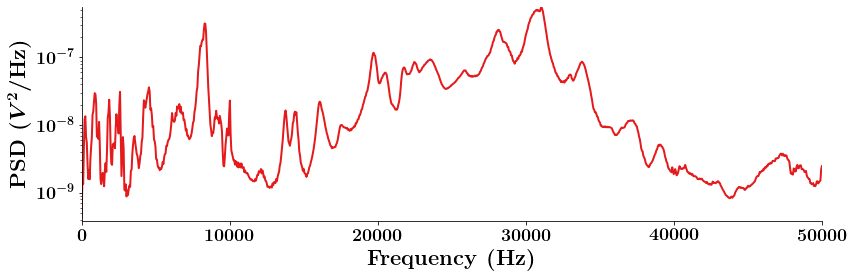

In [14]:

fftFreqs, fftAmps = signal.welch(data, fs=samplingRate, window='hanning', nperseg=2048)

plotting.generate_plot(fftFreqs,fftAmps,
                         [''],'Frequency (Hz)',r'PSD ($V^2/\mathrm{Hz}$)',showplot=True,
                         template='wide',
                         ymax=0.01,
                         save_plot=True,
                         transparent=True,
                         log_y=True,
                         num_col=2,
                         folder='figures',
                         filename='Impulsive_Signal_PSD',
                         file_type='png')


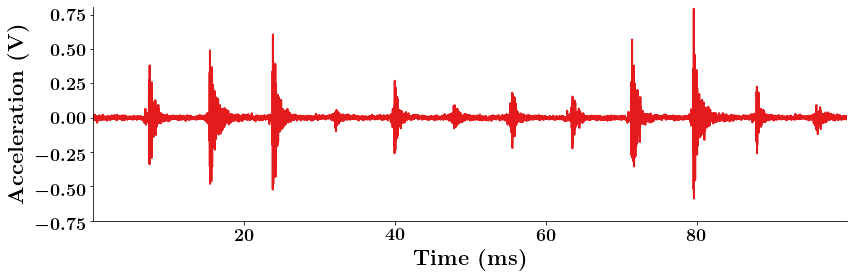

In [15]:
max_data_sample = 10000

time = np.arange(max_data_sample) / samplingRate * 1000

plotting.generate_plot(time,data[:max_data_sample],
                         [''],'Time (ms)',r'Acceleration (V)',showplot=True,
                         template='wide',
                         ymax=0.01,
                         save_plot=True,
                         transparent=True,
                         log_y=False,
                         num_col=2,
                         folder='figures',
                         filename='Impulsive_Signal_TimeSeries',
                         file_type='png')

In [17]:
Kwav, Level_w, freq_w, c = fast_kurtogram(data,samplingRate,nlevel=6)

Max Level: 4.584962500721156
Freq: 1042.1041666666667
Fs: 100000.0
Max Kurtosis: 90.56378979395683
Bandwidth: 2083.3333333333335


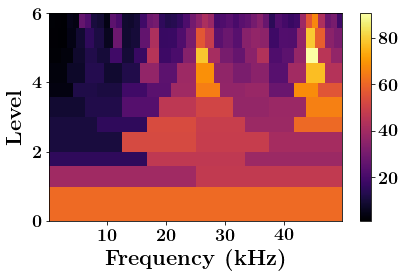

In [18]:
xi = freq_w / 1000
yi = Level_w
X, Y = np.meshgrid(xi, yi)
plt.figure(figsize=(6,4))

# Customize the axes
ax = plt.gca()
plt.pcolormesh(X,Y,Kwav,cmap='inferno')

# formatter = MyFormatter(time,fmt=date_format)
# ax.yaxis.set_major_formatter(formatter)
ax.tick_params(labelsize=18)

plt.colorbar()

xlabelpad = 5
ylabelpad = 5

plt.xlabel(r'\textbf{Frequency (kHz)}', labelpad=xlabelpad,fontsize=22)
plt.ylabel(r'\textbf{Level}', labelpad=ylabelpad,fontsize=22)

plt.tight_layout(pad=1.2)

/home/dnewman/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


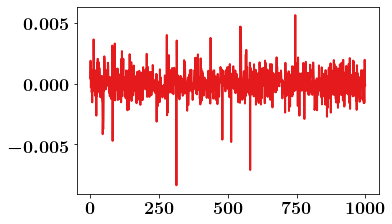

In [27]:
plt.plot(c[:1000])
plt.show()

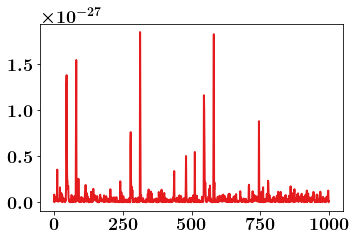

In [32]:
newData = np.abs(c)**2

b_low,a_low = signal.butter(4,4*speed,fs=samplingRate)
b_high,a_high = signal.butter(4,2 * speed,fs=samplingRate)

newData = signal.lfilter(b_low,a_low,newData)
newData = signal.lfilter(b_high,a_high,newData)


plt.plot(newData[:1000])
plt.show()


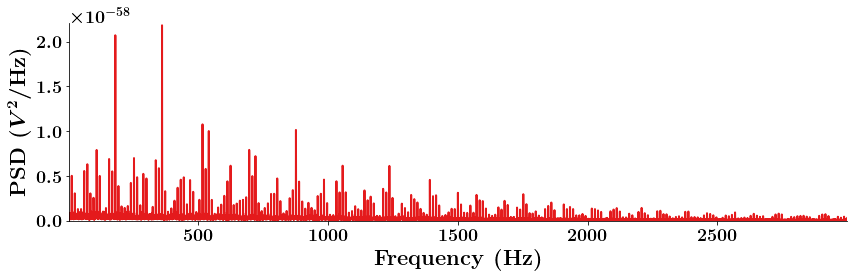

In [34]:
fftFreqs, fftAmps = signal.welch(newData.flatten(), fs=samplingRate, window='hanning', nperseg=16384)

plotting.generate_plot(fftFreqs / speed,fftAmps,
                         [''],'Frequency (Hz)',r'PSD ($V^2/\mathrm{Hz}$)',showplot=True,
                         template='wide',
                         ymax=0.01,
                         save_plot=True,
                         transparent=True,
                         log_y=False,
                         num_col=2,
                         folder='figures',
                         filename='Impulsive_Signal_Filtered_PSD',
                         file_type='png')

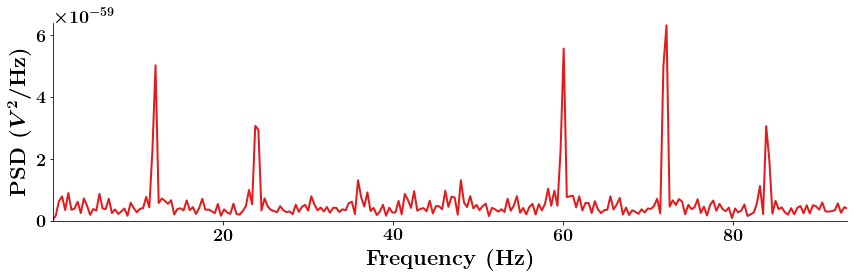

In [35]:
plotting.generate_plot(fftFreqs[:256] / speed,fftAmps[:256],
                         [''],'Frequency (Hz)',r'PSD ($V^2/\mathrm{Hz}$)',showplot=True,
                         template='wide',
                         ymax=0.01,
                         save_plot=True,
                         transparent=True,
                         log_y=False,
                         num_col=2,
                         folder='figures',
                         filename='Impulsive_Signal_Filtered_PSD',
                         file_type='png')